In [1]:
import pandas as pd

In [ ]:
df_circa2 = pd.read_excel('data/cyc_analysis_nonzero_circa2.xlsx', sheet_name = 'sig_cyl_gene')
df_circa4 = pd.read_excel('data/cyc_analysis_nonzero_circa4.xlsx', sheet_name = 'sig_cyl_gene')

In [ ]:
circa4_gene = set(df_circa4['CycID'])
circa2_gene = set(df_circa2['CycID'])

In [ ]:
common_genes = circa4_gene.intersection(circa2_gene)

In [ ]:
len(common_genes), len(circa4_gene),len(circa2_gene)

In [ ]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Use the venn2 function
venn2(subsets = (1449, 846, 560), set_labels = ('IGM', 'Salk'))
plt.show()


### Polar plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample structure: replace this with your real data
# Each row = one observation of a gene at a specific phase
data = pd.DataFrame({
                    'Gene': ['Arntl', 'Clock', 'Cry1', 'Cry2','Npas2', 'Nr1d1', 'Per2', 'Per3','Rorc',
                            'Arntl','Clock','Cry1','Nr1d1','Per1','Per2','Per3','Rorc'
                            ],
                    'Phase': [1.00, 8.38, 15.31, 12.89, 22.56, 8.96,15.30,13.06,16.54,
                              1.00, 3.15, 16.75, 9.02, 11.92, 16.23, 14.17, 17.06
                            ]
                    })

# Convert phase to radians for polar plot
data['Radians'] = data['Phase'] / 24 * 2 * np.pi

# Assign each gene a numeric ID for radial position (distance from center)
gene_order = data['Gene'].unique()
gene_to_radius = {gene: i for i, gene in enumerate(gene_order, start=1)}
data['Radius'] = data['Gene'].map(gene_to_radius)

# Color palette
palette = sns.color_palette("hls", len(gene_order))
gene_colors = dict(zip(gene_order, palette))
data['Color'] = data['Gene'].map(gene_colors)

# Plot
plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)
ax.grid(True)

# Scatter plot
for gene in gene_order:
    subset = data[data['Gene'] == gene]
    ax.scatter(subset['Radians'], subset['Radius'], label=gene, color=gene_colors[gene], s=40)

ax.set_yticks(range(1, len(gene_order) + 1))
ax.set_yticklabels(gene_order)
ax.set_ylim(0.5, len(gene_order) + 0.5)
ax.set_xticks(np.linspace(0, 2 * np.pi, 6, endpoint=False))
ax.set_xticklabels(['0', '4', '8', '12', '16', '20'])

plt.title('Clock Genes Phase')
ax.legend(bbox_to_anchor=(1.1, 1.0), loc="upper left", title='Gene')

plt.tight_layout()
plt.show()

### Cell type spe polar

In [ ]:
import pandas as pd
df = pd.read_excel('data/circa2_cyc_siggene_analysis_celltype.xlsx', sheet_name=None)

In [ ]:
clockgenelist=['Arntl', 'Clock', 'Cry1', 'Cry2', 'Npas2', 'Nr1d1', 'Per1', 'Per2', 'Per3', 'Rora', 'Rorb', 'Rorc']
dataset = pd.DataFrame()
for key in df.keys():
    subdf = df[key].filter(['CycID', 'meta2d_phase'], axis=1)
    subdf = subdf[subdf['CycID'].isin(clockgenelist)]
    dataset = pd.concat([dataset, subdf])

In [ ]:
all_celltype_CG = dict(zip(dataset['CycID'], dataset['meta2d_phase']))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample structure: replace this with your real data
# Each row = one observation of a gene at a specific phase
data = pd.DataFrame({
                    'Gene': dataset['CycID'],
                    'Phase': dataset['meta2d_phase']
                    })
data = data.sort_values('Gene')

# Convert phase to radians for polar plot
data['Radians'] = data['Phase'] / 24 * 2 * np.pi

# Assign each gene a numeric ID for radial position (distance from center)
gene_order = data['Gene'].unique()
gene_to_radius = {gene: i for i, gene in enumerate(gene_order, start=1)}
data['Radius'] = data['Gene'].map(gene_to_radius)

# Color palette
palette = sns.color_palette("hls", len(gene_order))
gene_colors = dict(zip(gene_order, palette))
data['Color'] = data['Gene'].map(gene_colors)

# Plot
plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)
ax.grid(True)

# Scatter plot
for gene in gene_order:
    subset = data[data['Gene'] == gene]
    ax.scatter(subset['Radians'], subset['Radius'], label=gene, color=gene_colors[gene], s=40)

# # for gene in gene_order:
# gene = 'Per1'
# subset = data[data['Gene'] == gene]
# ax.hist(subset['Radians'], subset['Radius'], label=gene, color=gene_colors[gene])  


# ax.set_yticks(range(1, len(gene_order) + 1))
# ax.set_yticklabels(gene_order)
# ax.set_ylim(0.5, len(gene_order) + 0.5)
ax.set_xticks(np.linspace(0, 2 * np.pi, 6, endpoint=False))
ax.set_xticklabels(['0', '4', '8', '12', '16', '20'])

plt.title('Clock Genes Phase')
ax.legend(bbox_to_anchor=(1.1, 1.0), loc="upper left")


plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
df_all = pd.read_excel('data/circa2_cyc_siggene_analysis_.xlsx', sheet_name=None)

In [ ]:
for idx, celltype in enumerate(df_all.keys()):

    # Data preparation
    df = pd.DataFrame(data=zip(df_all[celltype]['CycID'], df_all[celltype]['meta2d_phase']))
    df.columns = ['Gene','Phase']
    df['Radians'] = df['Phase'] / 24 * 2 * np.pi

    # Plot
    plt.figure(figsize=(6,6))
    ax = plt.subplot(111, polar=True)
    ax.set_theta_direction(-1)
    ax.set_theta_offset(np.pi / 2.0)
    ax.grid(True)

    ax.hist(df['Radians'], bins = 24)

    ax.set_xticks(np.linspace(0, 2 * np.pi, 6, endpoint=False))
    ax.set_xticklabels(['0', '4', '8', '12', '16', '20'])

    plt.title(f'Genes Phase in {celltype}')
    plt.savefig(f'Gallery/circa2/polar_gene_{celltype}.svg')


Text(0.5, 1.0, 'Genes Phase in CTX')

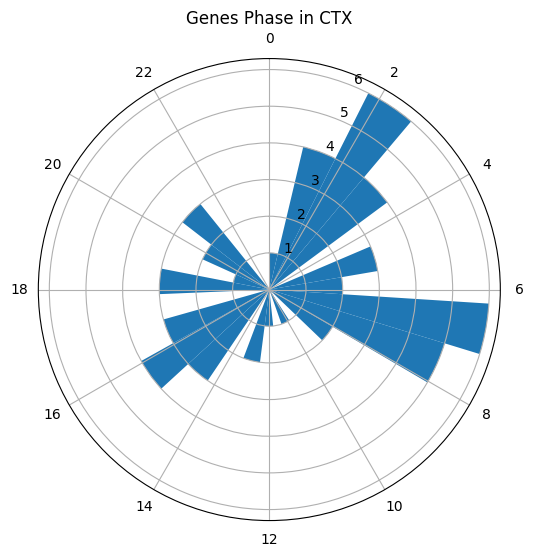

In [ ]:
import pandas as pd
from module.misc import genes_list

gene_list = genes_list('mitochondria')
region = 'CTX'
df_all = pd.read_excel(f'data/{region}_cyc_analysis.xlsx', sheet_name='sig_cyl_gene')

# Data preparation
df = pd.DataFrame(data=zip(df_all['CycID'], df_all['meta2d_phase']))
df.columns = ['Gene','Phase']
df = df[df['Gene'].isin(gene_list)]
df['Radians'] = df['Phase'] / 24 * 2 * np.pi

# Plot
plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)
ax.grid(True)

ax.hist(df['Radians'], bins = 24,
        #  color = 'green'
         )

ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
ax.set_xticklabels(['0', '2', '4','6', '8', '10','12','14', '16','18', '20','22'])

plt.title(f'Genes Phase in {region}')
# plt.savefig(f'Gallery/circa2/polar_gene_{region}.svg')

Text(0.5, 1.0, 'Genes Phase in non-zero')

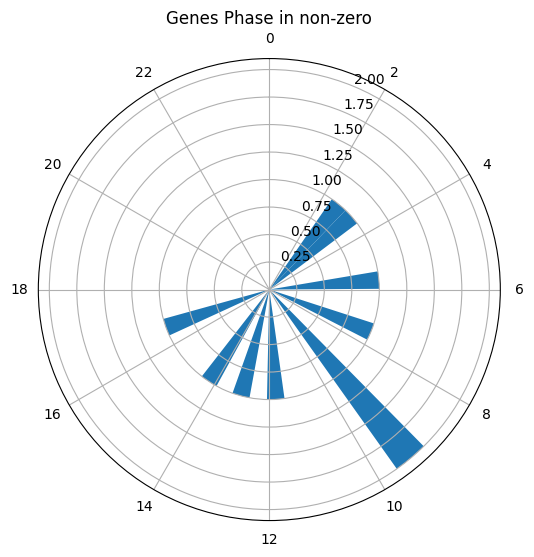

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from module.misc import genes_list

region = 'SCH'
df_all = pd.read_excel(f'data/SCH_cyc_analysis.xlsx', sheet_name='sig_cyl_gene')
gene_list = genes_list('mitochondria')

# Data preparation
df = pd.DataFrame(data=zip(df_all['CycID'], df_all['meta2d_phase']))
df.columns = ['Gene','Phase']
df = df[df['Gene'].isin(gene_list)]
df['Radians'] = df['Phase'] / 24 * 2 * np.pi

# Plot
plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)
ax.grid(True)

ax.hist(df['Radians'], bins = 24,
        #  color = 'green'
         )

ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
ax.set_xticklabels(['0', '2', '4','6', '8', '10','12','14', '16','18', '20','22'])

plt.title(f'Genes Phase in {region}')
# plt.savefig(f'Gallery/circa2/polar_gene_{region}.svg')